In [2]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# steps according to https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
    # Define a fitness function object.
    # Define an optimization problem object.
    # Select and run a randomized optimization algorithm.

In [5]:
fitness = mlrose.Queens()
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

   # Initialize counter
    fitness_cnt = 0

          # For all pairs of queens
    for i in range(len(state) - 1):
         for j in range(i + 1, len(state)):

        # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

               # If no attacks, then increment counter
               fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)


In [6]:
problem = mlrose.DiscreteOpt(length=8, fitness_fn=fitness, maximize=False, max_val=8)

In [7]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])




In [42]:
# Solve problem using random hill climbing
best_state, best_fitness = mlrose.random_hill_climb(problem,
                                                      max_attempts = 5000, max_iters = 50000,
                                                      init_state = init_state, random_state = 1)

In [48]:
# Solve problem using simulated annealing
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 150, max_iters = 5000,
                                                      init_state = init_state, random_state = 1)

In [52]:
# Solve problem using GA
best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, 
                                              max_iters=np.inf, curve=False, random_state=None)

In [60]:
# Solve problem using MIMIC
best_state, best_fitness = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                        max_iters=np.inf, curve=False, random_state=None)

In [141]:
# 4 Peaks
# Define initial state
init_state = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
                       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 
                       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 
                       1, 0, 1, 0, 1, 1, 1, 0, 0, 0])
fitness = mlrose.FourPeaks()


In [142]:
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)

In [161]:
# Solve problem using GA
best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=400, 
                                              max_iters=20000, curve=False, random_state=None)

In [163]:
# Solve problem using MIMIC
best_state, best_fitness = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=1000, 
                                        max_iters=np.inf, curve=False, random_state=None)

In [162]:
print (best_state, best_fitness)

[1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] 62.0


In [127]:
fitness = mlrose.FourPeaks(t_pct=0.1)
state = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fitness.evaluate(state)

0

In [ ]:
init_state = np.array()

In [21]:
#for i in range(10, 40, 10):
init_state = np.random.randint(2, size=50)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)

rhc_fitness_list = []
sa_fitness_list = []
ga_fitness_list= []
mimic_fitness_list = []

iters = np.arange(1, 500, 20)
iters = [2**i for i in range(4, 13)]
for i in iters:
#     # randomized hill climbing
#     rhc_best_state, rhc_best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = i,
#                                                           init_state = init_state, random_state = 1)
#     rhc_fitness_list.append(rhc_best_fitness)
    
#     # simulated annealing
#     sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
#                                                                 max_iters = i, init_state = init_state, 
#                                                                 random_state = 1)
#     sa_fitness_list.append(sa_best_fitness)
    
    # ga
    ga_best_state, ga_best_fitness = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.2, max_attempts=500, 
                                                        max_iters=i, curve=False, random_state=None)
    ga_fitness_list.append(ga_best_fitness)
    
    # mimic
    mimic_best_state, mimic_best_fitness = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=500, 
                                            max_iters=i, curve=False, random_state=None)
    mimic_fitness_list.append(mimic_best_fitness)
    


KeyboardInterrupt: 

In [14]:

plt.style.use('seaborn')
plt.plot(iters, fitness_list, 'o-', color="r",
             label="Fitness")

NameError: name 'fitness_list' is not defined

In [4]:
mimic_best_fitness

44.0

In [6]:
iters

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

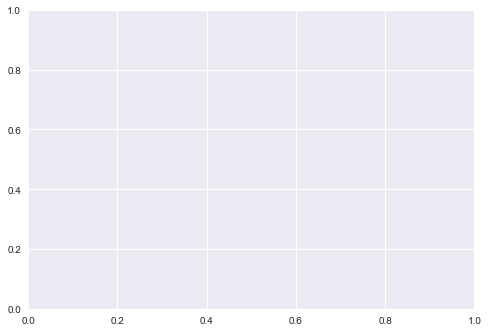

In [23]:
plt.style.use('seaborn')
# plt.plot(iters, rhc_fitness_list, 'o-', color="r", label="rhc")
# plt.plot(iters, sa_fitness_list, 'o-', color="olive", label="sa")
plt.plot(iters, ga_fitness_list, 'o-', color="black", label="ga")
plt.plot(iters, mimic_fitness_list, 'o-', color="g", label="mimic")
plt.xscale('log', basex=2)
plt.ylabel('Fitness', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.title('Fitness vs Iteration for 4 Peaks problem', fontsize=14)
plt.legend()
plt.show()

In [ ]:
plt.close()

In [44]:
#for i in range(10, 40, 10):
init_state = np.random.randint(2, size=20)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)

rhc_fitness_list = []
sa_fitness_list = []
ga_fitness_list= []
mimic_fitness_list = []

iters = np.arange(1, 500, 20)
iters = [2**i for i in range(4, 13)]
#for i in iters:
#     # randomized hill climbing
#     rhc_best_state, rhc_best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = i,
#                                                           init_state = init_state, random_state = 1)
#     rhc_fitness_list.append(rhc_best_fitness)
    
#     # simulated annealing
#     sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
#                                                                 max_iters = i, init_state = init_state, 
#                                                                 random_state = 1)
#     sa_fitness_list.append(sa_best_fitness)
    
# ga
# ga_best_state, ga_best_fitness = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.2, max_attempts=500, 
#                                                     max_iters=10, curve=False, random_state=None)
# ga_fitness_list.append(ga_best_fitness)

# mimic
mimic_best_state, mimic_best_fitness = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=400, 
                                        max_iters=1000, curve=False, random_state=None)
mimic_fitness_list.append(mimic_best_fitness)


In [45]:
mimic_best_fitness

33.0

In [322]:
num_runs = 6
init_state = np.random.randint(2, size=10)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)
# randomized hill climbing
iters = [2**i for i in range(10)]
rhc_best_fitness_arr = np.empty(len(iters))

for n in range(num_runs):
    fitness_list = []
    for iter in iters:
        rhc_best_state, rhc_best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = iter,
                                                              init_state = init_state)
        fitness_list.append(rhc_best_fitness)
    rhc_best_fitness_arr = np.vstack((rhc_best_fitness_arr, fitness_list))

In [257]:
print (rhc_best_fitness, rhc_best_state )

5.0 [1 1 1 1 1 0 0 0 1 1]


In [258]:
rhc_best_state

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [311]:
rhc_best_fitness_arr = np.empty(3)

In [318]:
rhc_best_fitness_arr = np.vstack((rhc_best_fitness_arr, [4, 5, 6]))

In [319]:
rhc_best_fitness_arr

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [4., 5., 6.]])

In [312]:
a=np.array([1, 2, 3])

In [323]:
rhc_best_fitness_arr

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  2., 15., 15., 18., 18., 18., 18., 18.],
       [15.,  2., 16., 18.,  6., 18., 18., 18., 18., 18.],
       [ 5., 15.,  2., 15., 15., 18., 18., 18., 18., 18.],
       [15., 15., 15.,  6.,  6., 18., 10., 18., 18., 18.],
       [ 2.,  2., 15., 15., 17., 18., 18., 18., 18., 18.],
       [ 2.,  2., 15.,  5., 18., 18., 18., 18., 18., 18.]])